In [164]:
import pandas as pd  # For handling datasets
import numpy as np  # For numerical operations (reshape)
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.linear_model import LinearRegression  # Model
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation
import matplotlib.pyplot as plt  # Visualization

In [166]:
df = pd.read_csv(r"C:\Users\likitha\Downloads\SAT to GPA.csv")

In [168]:
df

,SAT Score,GPA
0,1600,4.0
1,1593,4.0
2,1587,4.0
3,1580,4.0
4,1573,4.0
...,...,...
176,427,0.0
177,420,0.0
178,413,0.0
179,407,0.0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SAT Score  181 non-null    int64  
 1   GPA        181 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB


In [172]:
df.describe()

,SAT Score,GPA
count,181.000000,181.000000
mean,1000.000000,2.617901
std,349.293573,1.559243
min,400.000000,0.000000
25%,700.000000,1.390000
50%,1000.000000,3.370000
75%,1300.000000,3.970000
max,1600.000000,4.000000


In [174]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SAT Score,181.0,1000.000000,349.293573,400.0,700.00,1000.00,1300.00,1600.0
GPA,181.0,2.617901,1.559243,0.0,1.39,3.37,3.97,4.0


In [176]:
df.shape

(181, 2)

In [178]:
df.shape[0]

181

In [180]:
df.shape[1]

2

<Axes: xlabel='SAT Score', ylabel='Count'>

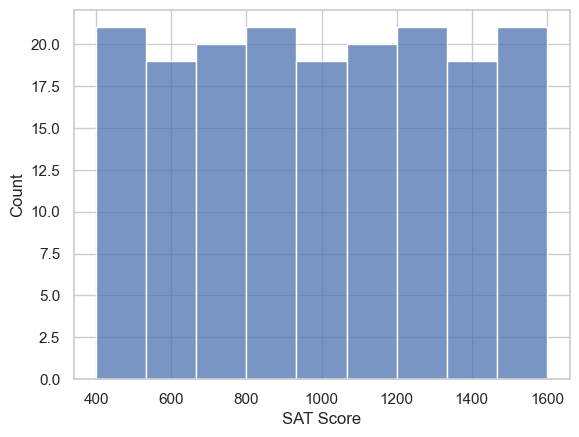

In [182]:
sns.histplot(df['SAT Score'])

<Axes: xlabel='GPA', ylabel='Count'>

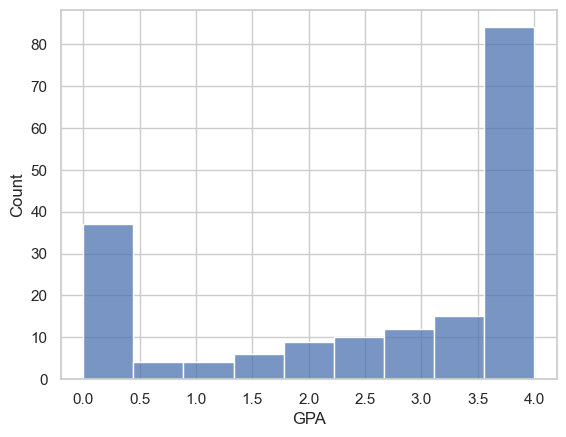

In [183]:
sns.histplot(df['GPA'])

In [221]:
X = df[['SAT Score']]  # Independent variable (TV budget)
y = df['GPA']        # Dependent variable (Sales)

In [223]:
X

,SAT Score
0,1600
1,1593
2,1587
3,1580
4,1573
...,...
176,427
177,420
178,413
179,407


In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=42)

In [227]:
y_test

19     3.99
42     3.97
153    0.00
78     3.68
145    0.15
15     3.99
24     3.99
68     3.83
113    2.58
118    2.35
93     3.28
159    0.00
69     3.82
142    0.62
45     3.97
16     3.99
51     3.95
125    2.00
96     3.19
56     3.93
97     3.16
120    2.25
143    0.48
30     3.99
9      4.00
172    0.00
60     3.91
18     3.99
148    0.00
173    0.00
109    2.74
55     3.93
140    0.87
126    1.95
66     3.85
29     3.99
117    2.39
65     3.86
67     3.84
31     3.99
12     3.99
41     3.98
124    2.05
100    3.06
161    0.00
132    1.62
90     3.37
38     3.98
169    0.00
115    2.49
171    0.00
156    0.00
2      4.00
176    0.00
46     3.97
Name: GPA, dtype: float64

In [229]:
df_y = pd.DataFrame(y_train)

In [231]:
df_y

,GPA
85,3.51
152,0.00
82,3.59
147,0.00
26,3.99
...,...
106,2.85
14,3.99
92,3.31
179,0.00


In [233]:
model = LinearRegression()
model.fit(X_train, y_train)

# Get the slope (coefficient) and intercept
print("Slope: ",{model.coef_[0]})
print("Intercept: ",{model.intercept_})

Slope:  {0.0040945737526873385}
Intercept:  {-1.4654835717229249}


In [235]:
y_pred = model.predict(X_test)

In [237]:
y_pred

array([4.56582357, 3.93935378, 0.9093692 , 2.95665608, 1.12638161,
       4.67637706, 4.43070263, 3.23099252, 2.0026204 , 1.86340489,
       2.54719871, 0.74558625, 3.20233051, 1.20827309, 3.85746231,
       4.64771504, 3.69367936, 1.6750545 , 2.46530723, 3.55855842,
       2.43664521, 1.81017543, 1.18370565, 4.26691968, 4.84016001,
       0.38935834, 3.44800493, 4.59448558, 1.04449014, 0.3647909 ,
       2.10907931, 3.58312587, 1.26559712, 1.64639248, 3.28422198,
       4.2955817 , 1.89206691, 3.312884  , 3.25555997, 4.23825767,
       4.75826853, 3.9680158 , 1.69962194, 2.35475374, 0.6923568 ,
       1.48260953, 2.62909018, 4.04990727, 0.47124981, 1.94529636,
       0.41802035, 0.82747773, 5.03260497, 0.28289942, 3.82880029])

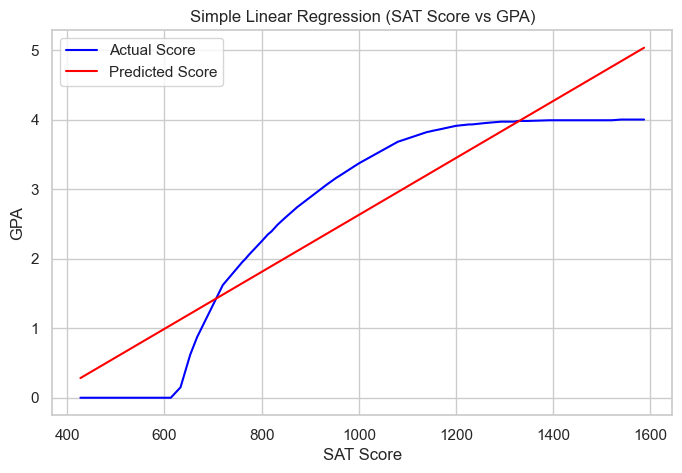

In [239]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=X_test['SAT Score'], y=y_test, color='blue', label="Actual Score")
sns.lineplot(x=X_test['SAT Score'], y=y_pred, color='red', label="Predicted Score")
plt.xlabel("SAT Score")
plt.ylabel("GPA")
plt.title("Simple Linear Regression (SAT Score vs GPA)")
plt.legend()
plt.show()

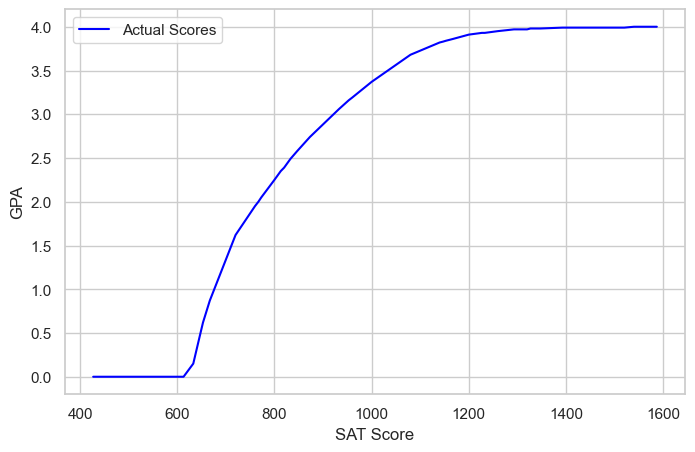

In [240]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=X_test['SAT Score'], y=y_test, color='blue', label="Actual Scores")
plt.xlabel("SAT Score")
plt.show()

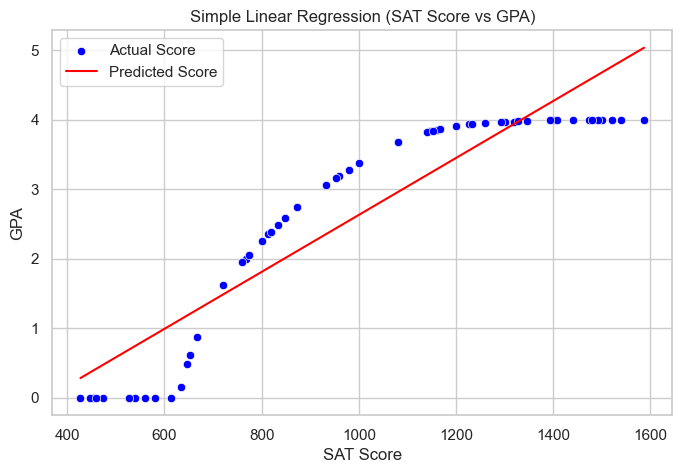

In [289]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['SAT Score'], y=y_test, color='blue', label="Actual Score")
sns.lineplot(x=X_test['SAT Score'], y=y_pred, color='red', label="Predicted Score")
plt.xlabel("SAT Score")
plt.ylabel("GPA")
plt.title("Simple Linear Regression (SAT Score vs GPA)")
plt.legend()
plt.show()

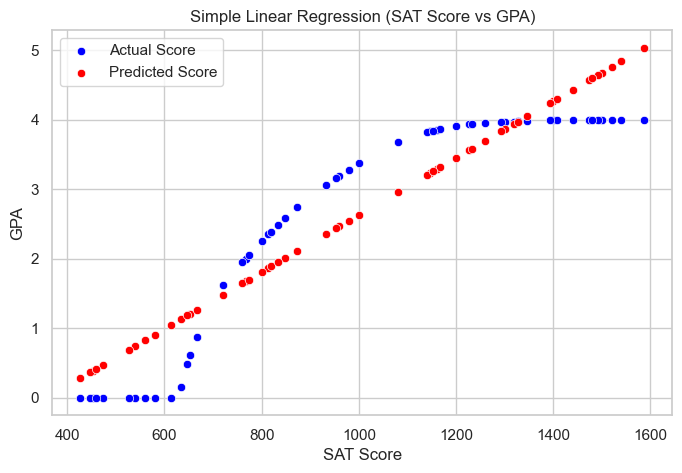

In [243]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['SAT Score'], y=y_test, color='blue', label="Actual Score")
sns.scatterplot(x=X_test['SAT Score'], y=y_pred, color='red', label="Predicted Score")
plt.xlabel("SAT Score")
plt.ylabel("GPA")
plt.title("Simple Linear Regression (SAT Score vs GPA)")
plt.legend()
plt.show()

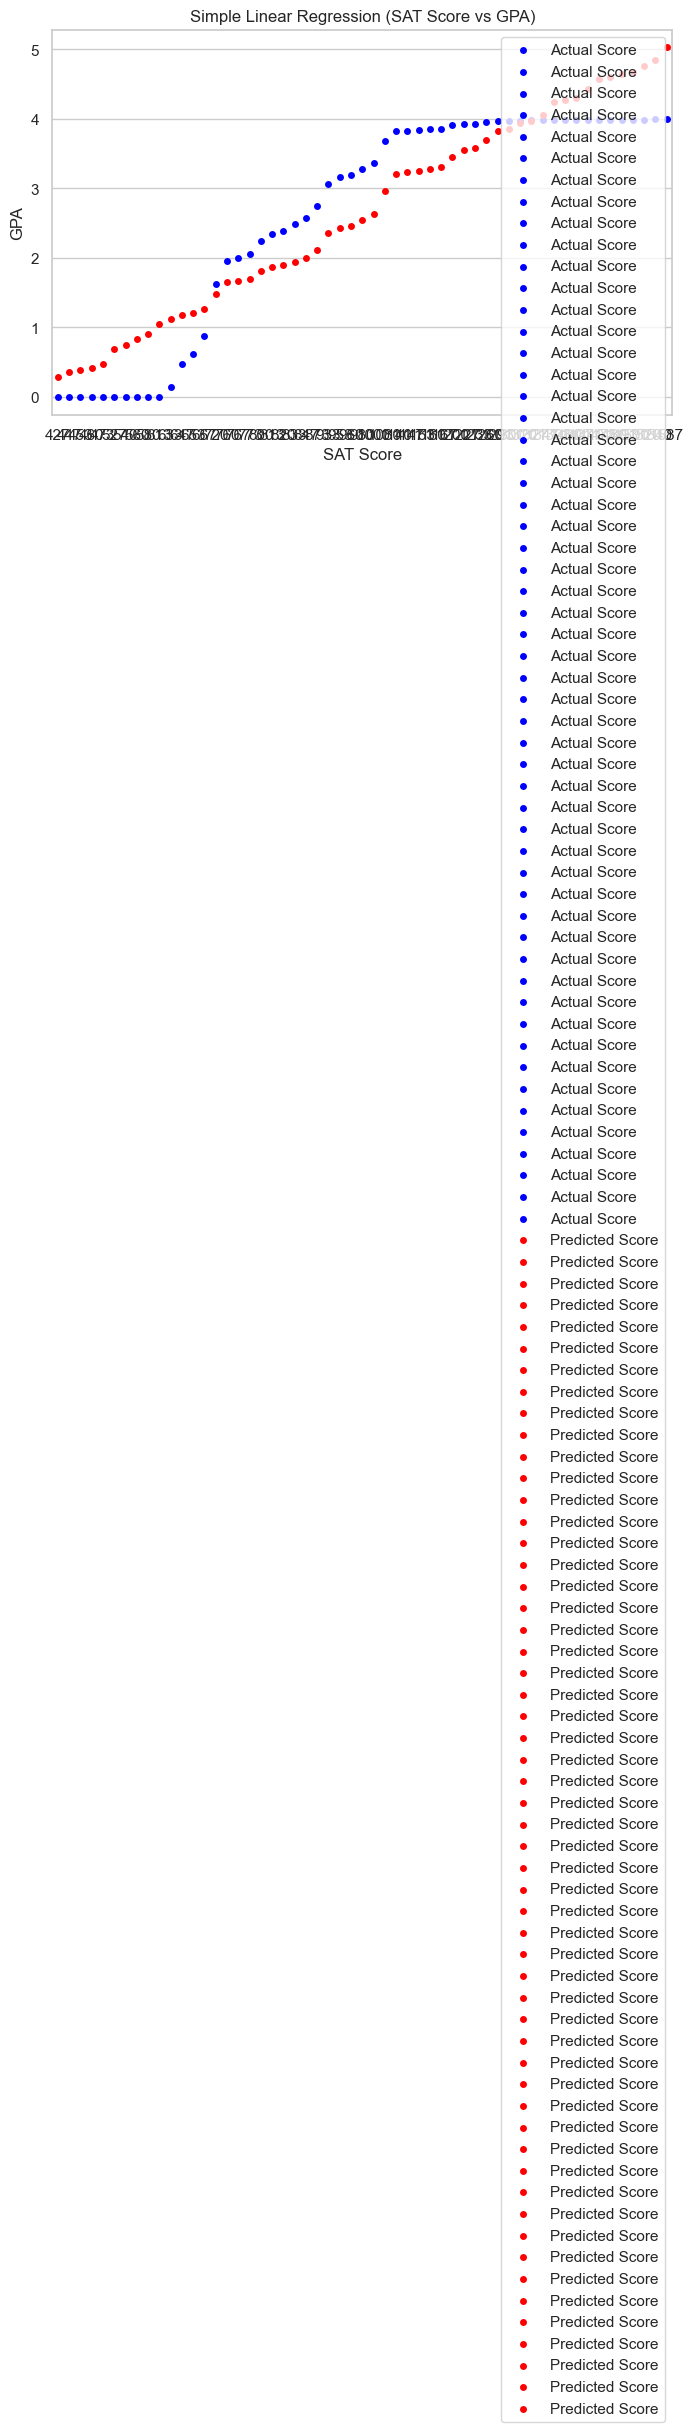

In [251]:
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid") 
sns.swarmplot(x=X_test['SAT Score'], y=y_test, color='blue', label="Actual Score")
sns.swarmplot(x=X_test['SAT Score'], y=y_pred, color='red', label="Predicted Score")
plt.xlabel("SAT Score")
plt.ylabel("GPA")
plt.title("Simple Linear Regression (SAT Score vs GPA)")
plt.legend()
plt.show()

In [254]:
y_test

19     3.99
42     3.97
153    0.00
78     3.68
145    0.15
15     3.99
24     3.99
68     3.83
113    2.58
118    2.35
93     3.28
159    0.00
69     3.82
142    0.62
45     3.97
16     3.99
51     3.95
125    2.00
96     3.19
56     3.93
97     3.16
120    2.25
143    0.48
30     3.99
9      4.00
172    0.00
60     3.91
18     3.99
148    0.00
173    0.00
109    2.74
55     3.93
140    0.87
126    1.95
66     3.85
29     3.99
117    2.39
65     3.86
67     3.84
31     3.99
12     3.99
41     3.98
124    2.05
100    3.06
161    0.00
132    1.62
90     3.37
38     3.98
169    0.00
115    2.49
171    0.00
156    0.00
2      4.00
176    0.00
46     3.97
Name: GPA, dtype: float64

In [255]:
y_pred

array([4.56582357, 3.93935378, 0.9093692 , 2.95665608, 1.12638161,
       4.67637706, 4.43070263, 3.23099252, 2.0026204 , 1.86340489,
       2.54719871, 0.74558625, 3.20233051, 1.20827309, 3.85746231,
       4.64771504, 3.69367936, 1.6750545 , 2.46530723, 3.55855842,
       2.43664521, 1.81017543, 1.18370565, 4.26691968, 4.84016001,
       0.38935834, 3.44800493, 4.59448558, 1.04449014, 0.3647909 ,
       2.10907931, 3.58312587, 1.26559712, 1.64639248, 3.28422198,
       4.2955817 , 1.89206691, 3.312884  , 3.25555997, 4.23825767,
       4.75826853, 3.9680158 , 1.69962194, 2.35475374, 0.6923568 ,
       1.48260953, 2.62909018, 4.04990727, 0.47124981, 1.94529636,
       0.41802035, 0.82747773, 5.03260497, 0.28289942, 3.82880029])

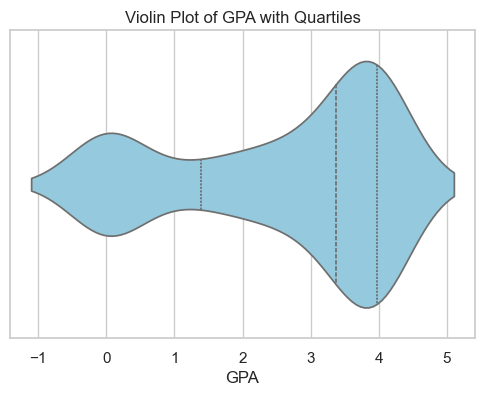

In [263]:
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['GPA'], inner="quartile", color="skyblue")  # Show quartiles inside
plt.title("Violin Plot of GPA with Quartiles")
plt.show()


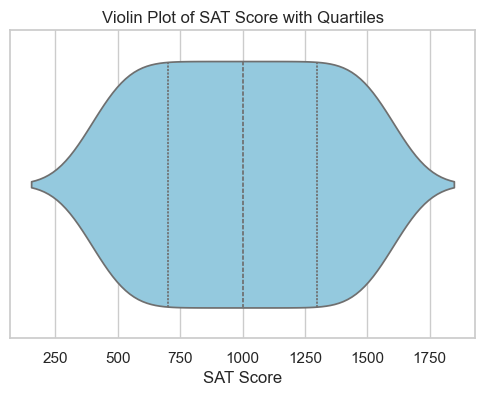

In [291]:
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['SAT Score'], inner="quartile", color="skyblue")  # Show quartiles inside
plt.title("Violin Plot of SAT Score with Quartiles")
plt.show()


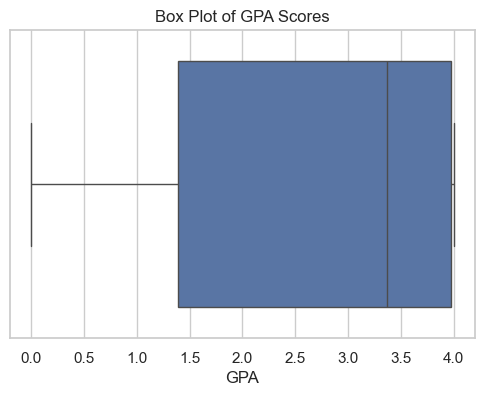

In [273]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['GPA'])
plt.title("Box Plot of GPA Scores")
plt.show()


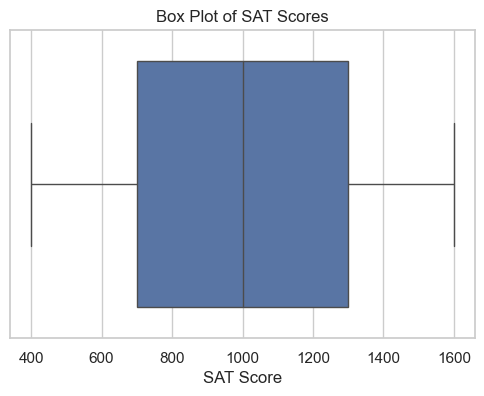

In [275]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['SAT Score'])
plt.title("Box Plot of SAT Scores")
plt.show()


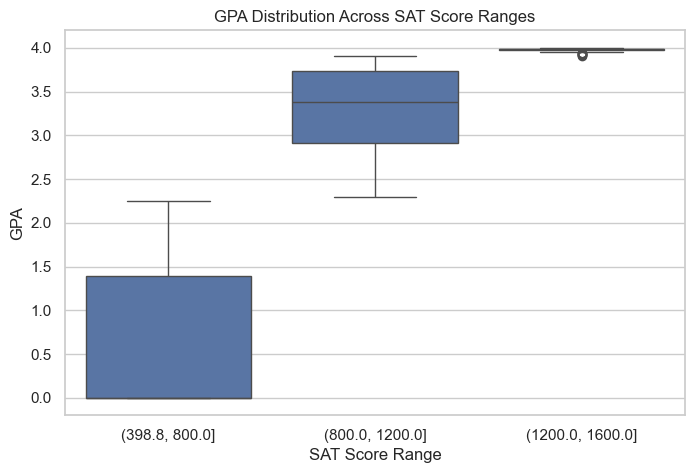

In [269]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=pd.cut(df['SAT Score'], bins=3), y=df['GPA'])
plt.xlabel("SAT Score Range")
plt.ylabel("GPA")
plt.title("GPA Distribution Across SAT Score Ranges")
plt.show()
